<a href="https://colab.research.google.com/github/GeneralHassaan/Project_2/blob/main/h_a_proj2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
# Project_2
# Hassaan Asif

In [3]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

This data set is solely focused on the income of adults based on multiple factors and how those factors affect their incomes.

In [4]:
# source https://www.kaggle.com/datasets/wenruliu/adult-income-dataset

filename = '/content/adult.csv'

df = pd.read_csv(filename)

df.head(20)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB



This is a **regression model**. The model consists of **13** features all together. The database has about 48,842 rows of data. The biggest challenge that I do see is building a connection with the other columns as each individual column seems to be unique.

In [32]:
# dropping unnecessary columns

df.drop(columns=['workclass' , 'education' , 'marital-status' , 'occupation' 
                 , 'relationship' , 'native-country'])

,age,fnlwgt,educational-num,race,gender,capital-gain,capital-loss,hours-per-week,income
0,25,226802,7,Black,Male,0,0,40,<=50K
1,38,89814,9,White,Male,0,0,50,<=50K
2,28,336951,12,White,Male,0,0,40,>50K
3,44,160323,10,Black,Male,7688,0,40,>50K
4,18,103497,10,White,Female,0,0,30,<=50K
...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,White,Female,0,0,38,<=50K
48838,40,154374,9,White,Male,0,0,40,>50K
48839,58,151910,9,White,Female,0,0,40,<=50K
48840,22,201490,9,White,Male,0,0,20,<=50K


In [33]:
# dropping unnecessary rows
df.isna().sum().sum
df.duplicated().sum()

52

In [34]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of        age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18             ?  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   


VISUALIZATIONS

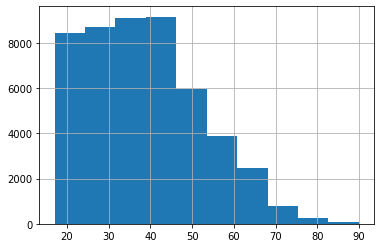

In [35]:
df['age'].hist()

from the histogram, we see most of our audience for this particular dataset is within their late 30s to mid 40s.

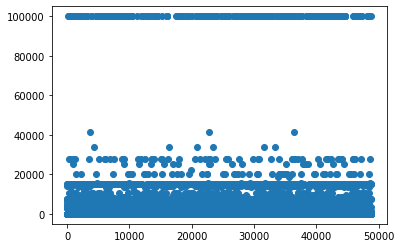

In [36]:
plt.scatter(df.index, df['capital-gain'])

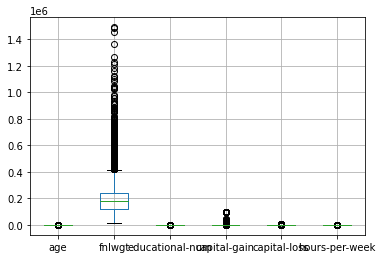

In [37]:
df.boxplot()

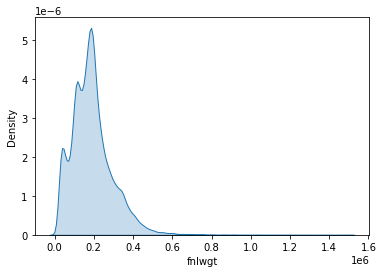

In [38]:
sns.kdeplot(df['fnlwgt'] , shade = True)

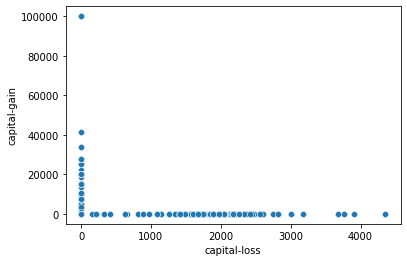

In [39]:
sns.scatterplot(data = df, x='capital-loss' , y = 'capital-gain')

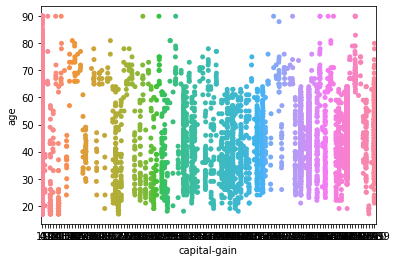

In [40]:
sns.stripplot(x = df['capital-gain'] , y = df['age'])

This graph tells us that older people or retired people have much higher capital gains compared to the younger generation.

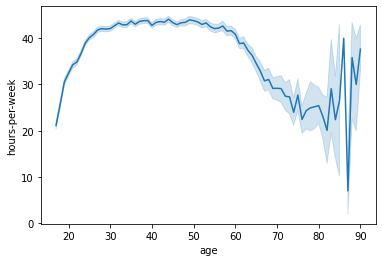

In [41]:
sns.lineplot(data = df , x='age' , y = 'hours-per-week')

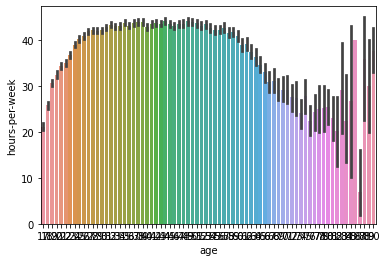

In [42]:
sns.barplot(data = df, x = 'age' , y = 'hours-per-week' )

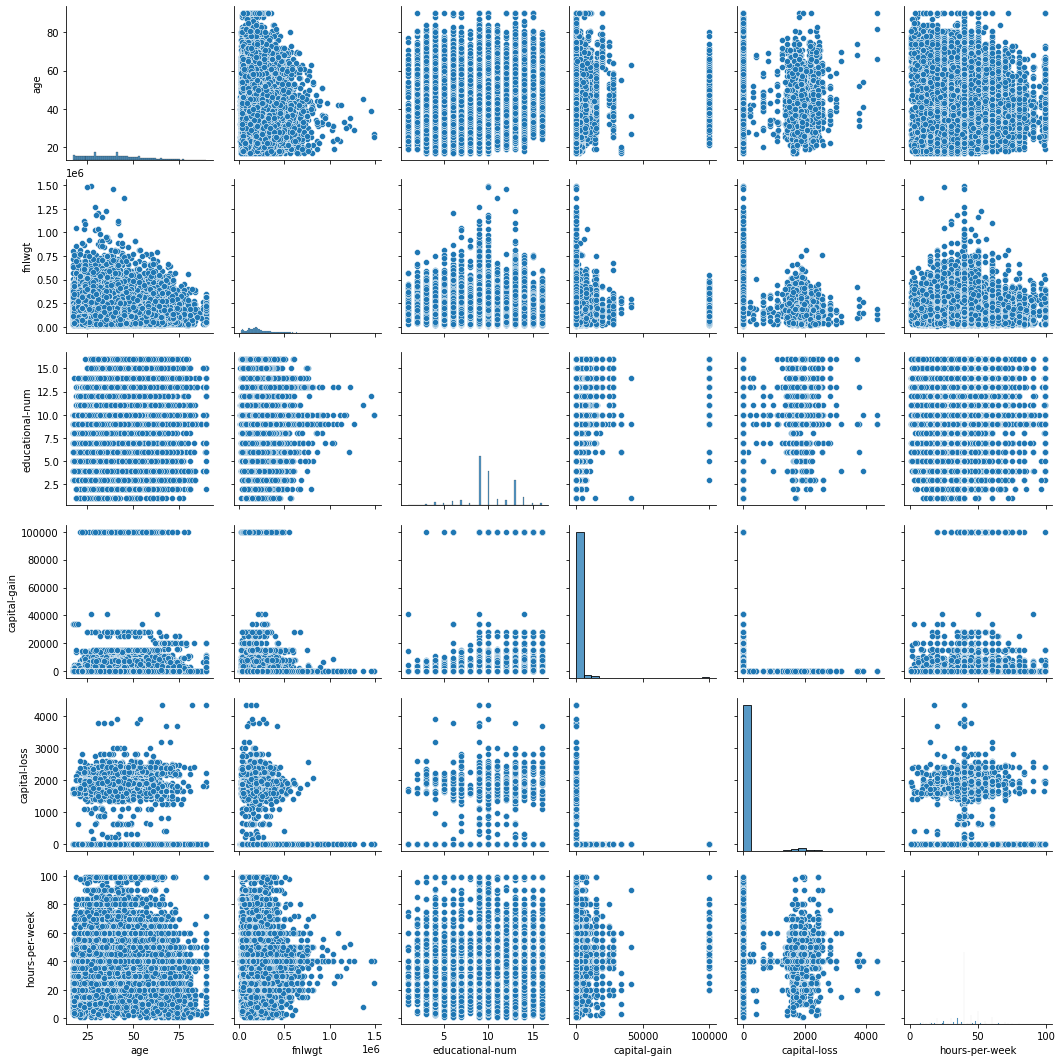

In [43]:
sns.pairplot(df)

In [44]:
# splitting data into X & Y

X = df.drop(columns = 'income')

le = LabelEncoder()
y = le.fit_transform(df['income'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [45]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')
train_cat_data = X_train[cat_selector(X_train)]
test_cat_data = X_test[cat_selector(X_test)]
train_cat_data

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
27859,?,Assoc-voc,Married-civ-spouse,?,Husband,White,Male,United-States
5654,Private,Bachelors,Married-civ-spouse,Handlers-cleaners,Wife,Asian-Pac-Islander,Female,Philippines
3779,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
10522,Self-emp-not-inc,Masters,Married-civ-spouse,Sales,Husband,White,Male,United-States
22461,Self-emp-not-inc,Prof-school,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
...,...,...,...,...,...,...,...,...
11284,Private,HS-grad,Married-spouse-absent,Other-service,Not-in-family,Black,Male,United-States
44732,Private,Some-college,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
38158,Private,Some-college,Divorced,Exec-managerial,Not-in-family,White,Female,United-States
860,State-gov,Assoc-voc,Separated,Adm-clerical,Unmarried,Black,Female,United-States


In [46]:
ohe_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
#fit the OneHotEncoder on the training data
ohe_encoder.fit(train_cat_data)
#transform both the training and the testing data
train_ohe = ohe_encoder.transform(train_cat_data)
test_ohe = ohe_encoder.transform(test_cat_data)
train_ohe

ohe_encoder.fit(train_cat_data)
ohe_column_names = ohe_encoder.get_feature_names_out(train_cat_data.columns)
train_ohe = pd.DataFrame(train_ohe, columns=ohe_column_names)
test_ohe = pd.DataFrame(test_ohe, columns=ohe_column_names)
train_ohe

,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36626,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
36627,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
36628,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
36629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [63]:
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [64]:
numeric_pipe = make_pipeline(mean_imputer, scaler)
categorical_pipe = make_pipeline(freq_imputer, ohe)

In [87]:
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)

In [66]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa4e5d5a3d0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa4e5d9a950>

In [67]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [91]:
dec_tree = DecisionTreeClassifier(random_state = 42, max_depth=2)
dec_tree.fit(X_train_processed, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [92]:
dec_tree.predict(X_test_processed)

array([0, 0, 1, ..., 0, 0, 0])

In [93]:
train_score = dec_tree.score(X_train_processed, y_train)
test_score = dec_tree.score(X_test_processed, y_test)
print(train_score)
print(test_score)

0.8261308727580464
0.8377692244697404


In [68]:
# scaling data
scaled_df = scaler.fit_transform(X_train_processed)

In [94]:
param_grid = {'max_depth': [1,2,3],
              'min_samples_leaf': [3,15,20],
              'min_samples_split': [2, 10, 100]}
 
pd.DataFrame(param_grid).T

,0,1,2
max_depth,1,2,3
min_samples_leaf,3,15,20
min_samples_split,2,10,100


In [100]:
scores = {}

for d in param_grid['max_depth']:
  for l in param_grid['min_samples_leaf']:
    for s in param_grid['min_samples_split']:
      #fit a model for each combination of hyperparameter values
      model = DecisionTreeClassifier(max_depth=d,
                                     min_samples_leaf=l,
                                     min_samples_split=s)
      model.fit(X_train_processed, y_train)
      score = model.score(X_test_processed, y_test)
      #add the model accuracy to a dictionary with the parameter settings as the
      #keys and the accuracies as the values.
      scores[f'depth {d}, min_samples_leaf {l}, min_samples_split {s} accuracy'] = score.round(6) * 100
 
#Display dictionary of scores
scores

{'depth 1, min_samples_leaf 3, min_samples_split 2 accuracy': 76.6031,
 'depth 1, min_samples_leaf 3, min_samples_split 10 accuracy': 76.6031,
 'depth 1, min_samples_leaf 3, min_samples_split 100 accuracy': 76.6031,
 'depth 1, min_samples_leaf 15, min_samples_split 2 accuracy': 76.6031,
 'depth 1, min_samples_leaf 15, min_samples_split 10 accuracy': 76.6031,
 'depth 1, min_samples_leaf 15, min_samples_split 100 accuracy': 76.6031,
 'depth 1, min_samples_leaf 20, min_samples_split 2 accuracy': 76.6031,
 'depth 1, min_samples_leaf 20, min_samples_split 10 accuracy': 76.6031,
 'depth 1, min_samples_leaf 20, min_samples_split 100 accuracy': 76.6031,
 'depth 2, min_samples_leaf 3, min_samples_split 2 accuracy': 83.7769,
 'depth 2, min_samples_leaf 3, min_samples_split 10 accuracy': 83.7769,
 'depth 2, min_samples_leaf 3, min_samples_split 100 accuracy': 83.7769,
 'depth 2, min_samples_leaf 15, min_samples_split 2 accuracy': 83.7769,
 'depth 2, min_samples_leaf 15, min_samples_split 10 accur

In [104]:
dt_grid_search = GridSearchCV(model, param_grid)

In [105]:
dt_grid_search.fit(X_train_processed, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=3, min_samples_leaf=20,
                                              min_samples_split=100),
             param_grid={'max_depth': [1, 2, 3],
                         'min_samples_leaf': [3, 15, 20],
                         'min_samples_split': [2, 10, 100]})

In [107]:
param_grid2 = {'max_depth': [3, 5, 10],
              'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 4, 7]}

In [108]:
dt_grid_search2 = GridSearchCV(model, param_grid2)
dt_grid_search2.fit(X_train_processed, y_train)
dt_grid_search2.best_params_

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 7}

In [109]:
best_model = dt_grid_search2.best_estimator_
# 
best_model.fit(X_train_processed, y_train)
#
best_model.score(X_test_processed, y_test)

0.86708705265744

In [121]:
knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
knn_pipe.get_params()

dt_grid_search = GridSearchCV(model, param_grid)

In [115]:
param_grid = {'kneighborsclassifier__n_neighbors': range(1,10),
              'kneighborsclassifier__p': range(1,5),
              'kneighborsclassifier__weights': ['balanced','uniform']}

In [ ]:
knn_pipe_gs = GridSearchCV(knn_pipe , param_grid)
 
knn_pipe_gs.fit(X_train_processed, y_train)
print('Best KNN Parameters:')
print(knn_pipe_gs.best_params_)
best_pipe = knn_pipe_gs.best_estimator_
print(f'Accuracy of best KNN model is: {best_pipe.score(X_test_processed, y_test)}')

From the entire we've seen that, about 86% of the adults make '<50K'. 